In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
%matplotlib inline
from IPython.display import Image
import os
# Tomer Tal 316471994 & Amit Shraga 208993493

# Question 2 - Camera calibration

## Section A

In [2]:
path = os.getcwd()
# print(path + '\img\chess1.jpeg.jpeg ', os.path.isfile(path + '\img\chess1.jpeg.jpeg'))
images = []

found = []

corners = []

image_corners = []

pattern_size = (7,7)

for i in range(20):
    images.append(cv2.imread(path + "\img\chess"+ str(i+1)+".jpeg", cv2.IMREAD_GRAYSCALE))
#       images.append(cv2.imread(path + "\img\chess1.jpeg", cv2.IMREAD_GRAYSCALE))

for i in range(20):
    foundT, cornersT = cv2.findChessboardCorners(images[i],pattern_size)
    found.append(foundT)
    corners.append(cornersT)
    
for i in range(20):
    image_cornersT = cv2.drawChessboardCorners(cv2.cvtColor(images[i],cv2.COLOR_GRAY2RGB),
             pattern_size,
             corners[i],
             found[i])
    image_corners.append(image_cornersT)


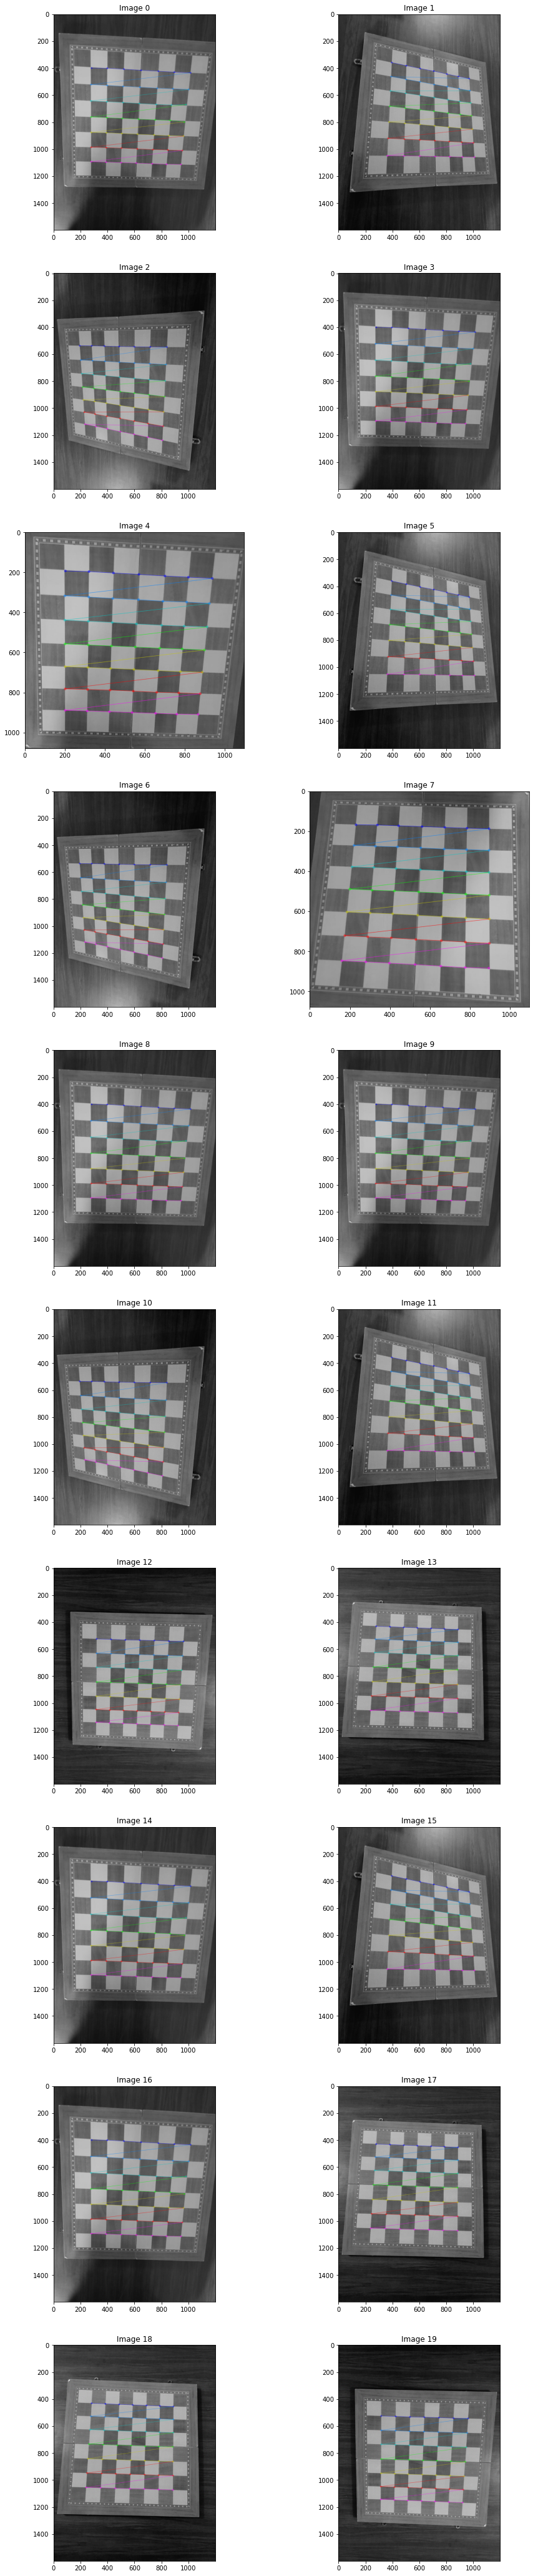

In [3]:
_, axes = plt.subplots(10, 2,
                       figsize=(15,75))

for (i, image), ax in zip(enumerate(images), chain.from_iterable(axes)):
    ax.imshow(image_corners[i])
    ax.set_title(f"Image {i}")

## Section B

In [4]:
from itertools import product
xs, ys = pattern_size
world_points = np.array([(x,y,0)
                       for y,x in product(range(ys),range(xs))],
                       dtype=np.float32)

## Section C - Perform a calibration

In [5]:
# perform calibration here
objectPoints = [world_points for i in range(20)]
retval, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(
    objectPoints,
    imagePoints=corners,
    imageSize=images[0].shape[::-1],
    cameraMatrix=None,
    distCoeffs=None)

# cameraMatrix - Intrinsic parameters that are specific to the camera. such as the focal length for example.
# distCoeffs-distortion coefficient - מאפיינים המתארים את העיוות של המצלמה
# rvecs-rotation vectors - רשימה של וקטורי רוטציה, כל וקטור רוטציה מתאר את הסיבוב עבור כל תמונה בכל אחד משלושת הצירים
# tvecs-translation vectors - רשימה של וקטורי הזזה, כל וקטור כזה מתאר את ההזזה בין ראשית הצירים של העולם לראשית הצירים של המצלמה, עבור כל תמונה בכל אחד משלושת הצירים



## Section D  - Camera matrix

In [6]:
# the element that represents the cameraMatrix is K.
   
extrinsic_transformations = [np.c_[cv2.Rodrigues(rvec)[0], tvec]
                             for tvec, rvec in zip(tvecs, rvecs)]
M_matrices = [np.dot(cameraMatrix,x)
              for x in extrinsic_transformations]


## Section E

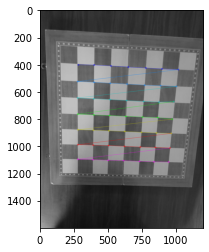

In [7]:
## Display the chessboard image here
foundT, cornersT = cv2.findChessboardCorners(images[0],pattern_size)
image_cornersT = cv2.drawChessboardCorners(cv2.cvtColor(images[0],cv2.COLOR_GRAY2RGB),
             pattern_size,
             cornersT,
             foundT)
plt.imshow(image_cornersT)

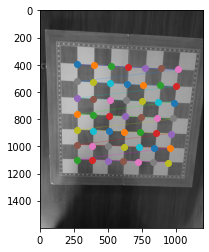

In [8]:
#Projection using camera matrix
fig,axs = plt.subplots(1,1)
plt.imshow(image_cornersT)
points = [np.dot(M_matrices[0],np.array([x,y,z,1])) for x,y,z in world_points]
car_outpoints = [(x/z,y/z) for x,y,z in points]
for i in car_outpoints:
  axs.scatter(i[0],i[1])

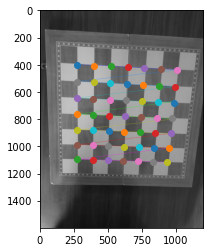

In [9]:
#Projection using cv2.projectPoints
fig,axs = plt.subplots(1,1)
plt.imshow(image_cornersT)
ppoints,jac = cv2.projectPoints(world_points, rvecs[0], tvecs[0], cameraMatrix, distCoeffs)
for p in ppoints:
  axs.scatter(p[0][0], p[0][1])

#There is a difference because the cv2.projectPoints takes in consideration distortion coefficients which affects the result.

## Section F

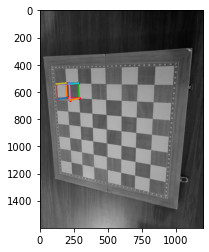

In [10]:
# Draw cube here
img = cv2.cvtColor(images[2], cv2.COLOR_GRAY2RGB)
fig,axs = plt.subplots(1,1)
plt.imshow(img)
square_w_p = np.array([[0.,0.,0.], [1.,0.,0.], [0.,1.,0.], [1.,1.,0.],
                       [0.,0.,-1.], [1.,0.,-1.], [0.,1.,-1.], [1.,1.,-1.]] )
ppoints,jac = cv2.projectPoints(square_w_p, rvecs[2], tvecs[2], cameraMatrix, distCoeffs)
shaped = np.reshape(ppoints, (8,2))

for p in ppoints:
  axs.scatter(p[0][0], p[0][1], color = "red", s = 3)
plt.plot((shaped[0][0],shaped[1][0]),(shaped[0][1],shaped[1][1]))
plt.plot((shaped[0][0],shaped[2][0]),(shaped[0][1],shaped[2][1]))
plt.plot((shaped[1][0],shaped[3][0]),(shaped[1][1],shaped[3][1]))
plt.plot((shaped[2][0],shaped[3][0]),(shaped[2][1],shaped[3][1]))

plt.plot((shaped[4][0],shaped[5][0]),(shaped[4][1],shaped[5][1]))
plt.plot((shaped[4][0],shaped[6][0]),(shaped[4][1],shaped[6][1]))
plt.plot((shaped[5][0],shaped[7][0]),(shaped[5][1],shaped[7][1]))
plt.plot((shaped[6][0],shaped[7][0]),(shaped[6][1],shaped[7][1]))

plt.plot((shaped[0][0],shaped[4][0]),(shaped[0][1],shaped[4][1]))
plt.plot((shaped[1][0],shaped[5][0]),(shaped[1][1],shaped[5][1]))
plt.plot((shaped[2][0],shaped[6][0]),(shaped[2][1],shaped[6][1]))
plt.plot((shaped[3][0],shaped[7][0]),(shaped[3][1],shaped[7][1]))


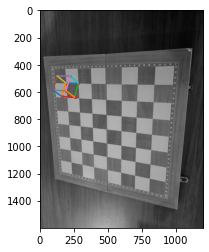

In [11]:
# Draw rotated cube here
from scipy.spatial.transform import Rotation

def rotate(pnt, angl_x, angl_y, angl_z):
  rotation = Rotation.from_euler('zyx', [angl_z, angl_y, angl_x], degrees=True)
  return rotation.apply(pnt)

img = cv2.cvtColor(images[2], cv2.COLOR_GRAY2RGB)
fig,axs = plt.subplots(1,1)
plt.imshow(img)
square_w_p = np.array([[0.,0.,0.], [1.,0.,0.], [0.,1.,0.], [1.,1.,0.],
                       [0.,0.,-1.], [1.,0.,-1.], [0.,1.,-1.], [1.,1.,-1.]] )

out_cube = []
for i in square_w_p:
  out_cube.append(rotate(i, -30., 0., 0.))
output = np.array(out_cube)
ppoints,jac = cv2.projectPoints(output, rvecs[2], tvecs[2], cameraMatrix, distCoeffs)
shaped = np.reshape(ppoints, (8,2))
for p in ppoints:
  axs.scatter(p[0][0], p[0][1], color = "red", s = 3)
plt.plot((shaped[0][0],shaped[1][0]),(shaped[0][1],shaped[1][1]))
plt.plot((shaped[0][0],shaped[2][0]),(shaped[0][1],shaped[2][1]))
plt.plot((shaped[1][0],shaped[3][0]),(shaped[1][1],shaped[3][1]))
plt.plot((shaped[2][0],shaped[3][0]),(shaped[2][1],shaped[3][1]))

plt.plot((shaped[4][0],shaped[5][0]),(shaped[4][1],shaped[5][1]))
plt.plot((shaped[4][0],shaped[6][0]),(shaped[4][1],shaped[6][1]))
plt.plot((shaped[5][0],shaped[7][0]),(shaped[5][1],shaped[7][1]))
plt.plot((shaped[6][0],shaped[7][0]),(shaped[6][1],shaped[7][1]))

plt.plot((shaped[0][0],shaped[4][0]),(shaped[0][1],shaped[4][1]))
plt.plot((shaped[1][0],shaped[5][0]),(shaped[1][1],shaped[5][1]))
plt.plot((shaped[2][0],shaped[6][0]),(shaped[2][1],shaped[6][1]))
plt.plot((shaped[3][0],shaped[7][0]),(shaped[3][1],shaped[7][1]))

In [ ]:
# Section G:
# There is a problem with this approach because the pictures he took from the internet 
# have been taken by different cameras. so the calculation of the camera matrix and the distortion coefficients
# will not be accurate.